####        

## STAT 504 Analytics
## Homework 3 for Dataset 2 - Music Data
### Mohammad Ashrafuzzaman

In [2]:
import matplotlib
%matplotlib nbagg
import matplotlib.pyplot as plt
from ggplot import *

from pprint import pprint
import pyparser
import pyparsing
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
import pylab
import scipy.sparse as sp
import urllib
import math
import time
import json
from pandas.io.json import json_normalize
from math import log
from math import exp
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO  
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr, chi2
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import Image



Couldn't import dot_parser, loading of dot files will not be possible.


## DATASET 2 - MUSIC DATA

Filename: "music.json"

## Data Loading and Massaging

In [3]:
file = 'music.json'
with open(file, 'rU') as f:
    data = [json.loads(row) for row in f]
    data2 = pd.DataFrame(data)
music51 = data2[(data2.overall==5) | (data2.overall==1)]
Xmusic = music51.reviewText
ymusic = music51.overall
ybin = np.where(ymusic==5, 1, 0)
kfm = KFold(len(ymusic), n_folds = 10, random_state = 338)
vect = CountVectorizer(max_features = 1000)


In [4]:
X = vect.fit_transform(Xmusic)
y = ybin


# MODEL EVALUATIONS

## 1. Null Model 

In [5]:
start = time.time()
ypredm = np.ones(131960)
null_score = metrics.roc_auc_score(ybin, ypredm)
end = time.time()
time_1_null = end - start
print "The AUC with Null Model: ", null_score
print "Time: ", time_1_null

The AUC with Null Model:  0.5
Time:  0.0240001678467


### 2. Logistic Regression Model

In [6]:
start = time.time()
lreg = LogisticRegression(random_state = 22, C=1e9)
lreg.fit(X,y)
lreg_scores_acc = cross_val_score(lreg, X, y, cv=kfm, scoring='accuracy').mean()
lreg_scores_roc = cross_val_score(lreg, X, y, cv=kfm, scoring='roc_auc').mean()
end = time.time()
time_1_logreg = end - start
print "Accuracy with Logistic Regression is: ", lreg_scores_acc
print "ROC AUC with Logistic Regression is :", lreg_scores_roc
print "Time = ", time_1_logreg

Accuracy with Logistic Regression is:  0.951023037284
ROC AUC with Logistic Regression is : 0.951540900709
Time =  109.996999979


### 3. K Nearest-Neighbor Model

In [ ]:
# Find an optimal value of K for KNN
k_range = range(1, 20)
k_scores_acc = []
k_scores_roc = []
start = time.time()
for k in k_range:
    knnopt = KNeighborsClassifier(n_neighbors=k)
    scores_acc = cross_val_score(knnopt, X, y, cv=kfm, scoring='accuracy')
    k_scores_acc.append(scores_acc.mean())
    scores_roc = cross_val_score(knnopt, X, y, cv=kfm, scoring='roc_auc')
    k_scores_roc.append(scores_roc.mean())
end = time.time()
print "k_scores_acc: ", k_scores_acc
print "k_scores_roc: ", k_scores_roc
print "Time: " + str(end - start)


In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores_acc, color = 'red', linewidth = 1)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')


In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores_roc, color = 'green', linewidth = 1)
plt.xlabel('Value of k')
plt.ylabel('ROC AUC')

Looks like the optimal value of k is 99 for both Accuracy and ROC AUC.

#### K Nearest-Neighbor Model with k=99

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=99)
knn_scores_acc = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
knn = KNeighborsClassifier(n_neighbors=99)
knn_scores_roc = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_knn = end - start
print "Accuracy with kNN with k=99: ", knn_scores_acc
print "Accuracy with kNN with k=99: ", knn_scores_roc
print "Time: " + str(time_1_knn)


### 4. Naive-Bayes - Multinomial Model

In [7]:
start = time.time()
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores_acc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
nbm_scores_roc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_nbm = end - start
print "Accuracy with Naive-Bayes - Multinomial Model: ", nbm_scores_acc
print "ROC AUC with Naive-Bayes - Multinomial Model: ", nbm_scores_roc
print "Time: ", time_1_nbm


Accuracy with Naive-Bayes - Multinomial Model:  0.927712943316
ROC AUC with Naive-Bayes - Multinomial Model:  0.924737098485
Time:  2.31299996376


### 5. Naive-Bayes - Gaussian Model

In [10]:
start = time.time()
nbg = GaussianNB()
nbg.fit(X.toarray(), y)
GaussianNB()
nbg_scores_acc = cross_val_score(nbg, X.toarray(), y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
nbg_scores_roc = cross_val_score(nbg, X.toarray(), y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_nbg = end - start
print "Accuracy with Naive-Bayes - Gaussian Model: ", nbg_scores_acc
print "ROC AUC with Naive-Bayes - Gaussian Model: ", nbg_scores_roc
print "Time: ",  time_1_nbg


Accuracy with Naive-Bayes - Gaussian Model:  0.643785995756
ROC AUC with Naive-Bayes - Gaussian Model:  0.77421806284
Time:  39.3849999905


### 6. Naive-Bayes - Bernoulli Model

In [11]:
start = time.time()
nbb = BernoulliNB()
nbb.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb_scores_acc = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
nbb_scores_roc = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_nbb = end - start
print "Accuracy with Naive-Bayes - Gaussian Model: ", nbb_scores_acc
print "ROC AUC with Naive-Bayes - Gaussian Model: ", nbb_scores_roc
print "Time: ",  time_1_nbb

Accuracy with Naive-Bayes - Gaussian Model:  0.9202106699
ROC AUC with Naive-Bayes - Gaussian Model:  0.92924700888
Time:  3.07399988174


<IPython.core.display.Javascript object>


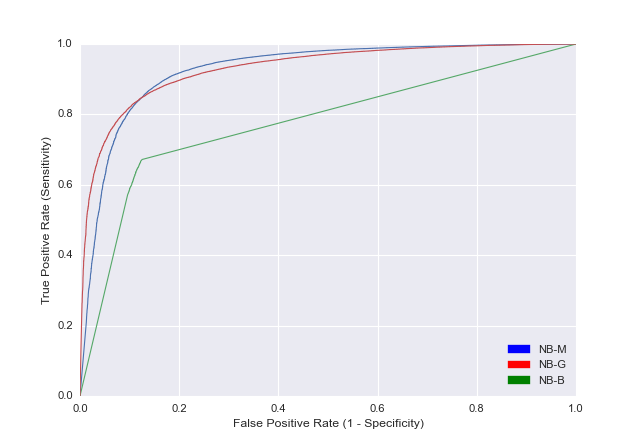

In [13]:
import matplotlib
%matplotlib nbagg
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

nbm_preds = nbm.predict_proba(X)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y, nbm_preds)

nbg_preds = nbg.predict_proba(X.toarray())[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y, nbg_preds)

nbb_preds = nbb.predict_proba(X)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y, nbb_preds)

plt.plot(nbm_fpr, nbm_tpr, nbg_fpr, nbg_tpr, nbb_fpr, nbb_tpr, linewidth = 1.0)
#color='magenta', label='lr_auc=0.956')
#plt.plot(nbg_fpr, nbg_tpr, color='green')
#plt.plot(nbb_fpr, nbb_tpr, color='yellow')
blue_patch = mpatches.Patch(color='blue', label='NB-M')  
red_patch= mpatches.Patch(color='red', label='NB-G' )  
green_patch= mpatches.Patch(color='green', label='NB-B')  
plt.legend(handles=[blue_patch, red_patch, green_patch], loc=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

### 7. SVM Polynomial Kernel Model

In [ ]:
start = time.time()
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
end = time.time()
print svmpoly_scores
print "Time: " + str(end-start)

In [ ]:
# search for an optimal gamma for SVM Polynomial Kernel Model
g_range = range(1, 10)
g_scores = []
start = time.time()
for k in g_range:
    knn = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
end = time.time()
print g_scores
print "Time: " + str(end-start)

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(g_range, g_scores)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [ ]:
# SVM Polynomial with optimized gamma
start = time.time()
svmpoly = svm.SVC(kernel='poly', gamma=8)
svmpoly.fit(X,y)
svmpoly_acc = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
svmpoly_roc = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_svmpoly = end - start
print "SVM Polynomial with optimized gamma (=8) for accuracy: " + str(svmpoly_acc)
print "SVM Polynomial with optimized gamma (=8) for ROC AUC: " + str(svmpoly_roc)
print "Time: " + str(time_1_svmpoly)

### 8. SVM Gaussian Kernel Model

In [ ]:
svmg = svm.SVC(kernel='rbf', gamma=2)
svmg.fit(X,y)
svmg_scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmg_scores

In [ ]:
# search for an optimal gamma for SVM Gaussian Kernel Model
start = time.time()
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmg = svm.SVC(kernel='rbf', gamma=k)
    scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
end = time.time()
print g_scores
print "Time: " + str(end-start)

In [ ]:
import matplotlib
%matplotlib nbagg

plt.plot(g_range, g_scores)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [ ]:
start = time.time()
svmrbf = svm.SVC(kernel='rbf', gamma=8)
svmrbf.fit(X,y)
svmrbf_acc = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
svmrbf_roc = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_svmrbf = end - start
print "Accuracy of SVM Gaussian Model with gamma=8 : " + str(svmrbf_acc)
print "ROC AUC of SVM Gaussian Model with gamma=8 : " + str(svmrbf_roc)
print "Time for SVM Gaussian Model with gamma=8 : " + str(time_1_svmrbf)

### 9. Decision Tree Classifier Model

In [ ]:
# Find optimal depth for Decision Tree Classifier Model
start = time.time()
dtc_range = range(1, 40)
dtc_scores_acc = []
dtc_scores_roc = []
for k in dtc_range:
    dtc = DecisionTreeClassifier(random_state = 22, max_depth=k)
    dtc_scores_a = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
    dtc_scores_acc.append(dtc_scores_a.mean())
    dtc_scores_r = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    dtc_scores_roc.append(dtc_scores_r.mean())
end = time.time()
print "Accuracy of Decision Tree Classifier Model : " + str(dtc_scores_acc)
print "ROC AUC of Decision Tree Classifier Model : " + str(dtc_scores_roc)
print "Time: " +str(end-start)

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(dtc_range, dtc_scores_roc)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('ROC AUC')

#### Seems the best result happens at depth=3

In [24]:
start = time.time()
dtc = DecisionTreeClassifier(random_state = 22, max_depth=3)
dtc.fit(X,y)
dtc_scores_acc = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
dtc_scores_auc = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_DTC_opt = end-start
print "Accuracy of Decision Tree Classifier Model with optimal depth (=3) : " + str(dtc_scores_acc)
print "ROC AUC of Decision Tree Classifier Model with optimal depth (=3) : " + str(dtc_scores_auc)
print "Time: " +str(time_1_DTC_opt)

Accuracy of Decision Tree Classifier Model with optimal depth (=3) : 0.916542891785
ROC AUC of Decision Tree Classifier Model with optimal depth (=3) : 0.697028981908
Time: 40.3930001259


### 10. Decision Tree Bagging Classification Method

In [ ]:
# Find optimal depth for Decision Tree Classifier Model
start = time.time()
bag_scores_acc = []
bag_scores_roc = []
bag_scores_mse = []
bag = BaggingClassifier(max_samples = 1000, random_state = 22)
bag_range = range(1, 50)
for k in bag_range:
    bag_cl = BaggingClassifier(bag, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_cl.fit(X, y)
    bag_scores_a = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores_m = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    bag_scores_r = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc') 
    bag_scores_acc.append(bag_scores_a.mean())
    bag_scores_mse.append(np.mean(np.sqrt(-bag_scores_m)))
    bag_scores_roc.append(bag_scores_r.mean())
end = time.time()

print bag_scores_acc
print bag_scores_roc
print bag_scores_mse
print "Time: " + str(end-start)

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(bag_range, bag_scores_mse)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

In [23]:
start = time.time()
bag = BaggingClassifier(max_samples = 1000, random_state = 22)
bag_cl = BaggingClassifier(bag, n_estimators=2, max_samples=1.0, bootstrap = False, bootstrap_features = True, random_state=42)
bag_cl.fit(X, y)
bag_scores_acc = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
bag_scores_mse = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error').mean()
bag_scores_roc = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean() 
end = time.time()
time_1_BagDTC_opt = end-start
print "Accuracy of Decision Tree Bagging Classification Method with optimal Estimator (=2) : " + str(bag_scores_acc)
print "ROC AUC of Decision Tree Bagging Classification Method with optimal Estimator (=2) : " + str(bag_scores_roc)
print "RMSE of Decision Tree Bagging Classification Method with optimal Estimator (=2) : " + str(bag_scores_mse)
print "Time: " +str(time_1_BagDTC_opt)

Accuracy of Decision Tree Bagging Classification Method with optimal Estimator (=2) : 0.914458926948
ROC AUC of Decision Tree Bagging Classification Method with optimal Estimator (=2) : 0.781821338408
RMSE of Decision Tree Bagging Classification Method with optimal Estimator (=2) : -0.0856395877539
Time: 474.269000053


### 11. Random Forest Model

In [ ]:
start = time.time()
rf_results = []
leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for min_samples in leaf_options:
    rf = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    rf.fit(X, y)
    roc = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print str(min_samples) + ": C-stat: "+ str(roc)
    rf_results.append(roc)

end = time.time()
print "Time = " + str(end - start)

In [ ]:
# Find Optimal Depth 
start = time.time()
r_range = range(1, 50)
rf_scores_acc = []
rf_scores_roc = []

for k in r_range:
    rfc = RandomForestClassifier(max_depth=k)
    rf_scores_a = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rf_scores_acc.append(rf_scores_a.mean())
    rf_scores_r = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
    rf_scores_roc.append(rf_scores_r.mean())
print rf_scores_acc
print rf_scores_roc
end = time.time()
print "Time = " + str(end - start)

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(r_range, rf_scores_acc)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(r_range, rf_scores_roc)
plt.xlabel('Depth')
plt.ylabel('ROC AUC')

In [ ]:
# Optimizing for maximum number of features
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    rfc = RandomForestClassifier(n_estimators=44, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    rfc.fit(X, y)
    roc = cross_val_score(rfc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option: C-stat = ", roc
    results.append(roc)

    

In [22]:
# Re-run with optimized parameters
start = time.time()
rfc = RandomForestClassifier(n_estimators=44, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=5, random_state=42)
rfc.fit(X.toarray(), y)
rf_scores_acc = cross_val_score(rfc, X.toarray(), y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
rfc = RandomForestClassifier(n_estimators=44, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=21, random_state=42)
rfc.fit(X.toarray(), y)
rf_scores_roc = cross_val_score(rfc, X.toarray(), y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_rf = end - start
print "Accuracy of Random Forest Classification Method with optimized parameters : " + str(rf_scores_acc)
print "ROC AUC of Random Forest Classification Method with optimized parameters : " + str(rf_scores_roc)
print "Time: " +str(time_1_rf)

Accuracy of Random Forest Classification Method with optimized parameters : 0.920680509245
ROC AUC of Random Forest Classification Method with optimized parameters : 0.926564537681
Time: 1670.59899998


### 13. Bagged Random Forest Model

In [ ]:
brf_range = range(1, 20)
brf_scores_acc = []
brf_scores_roc = []
for k in brf_range:
    brf = RandomForestClassifier(n_estimators=k, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=5, random_state=42)
    brf.fit(X, y)
    brf_scores_a = cross_val_score(brf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    brf_scores_acc.append(brf_scores_a.mean())
    brf = RandomForestClassifier(n_estimators=k, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=21, random_state=42)
    brf.fit(X, y)
    brf_scores_r = cross_val_score(brf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
    brf_scores_roc.append(brf_scores_r.mean())

print brf_scores_acc
print brf_scores_roc


In [ ]:
import matplotlib
%matplotlib nbagg

plt.plot(brf_range, brf_scores_acc)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')

In [ ]:
import matplotlib
%matplotlib nbagg

plt.plot(brf_range, brf_scores_roc)
plt.xlabel('N Estimators')
plt.ylabel('ROC AUC')

In [19]:
start = time.time()
brf = RandomForestClassifier(n_estimators=21, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=14, random_state=42)
brf.fit(X.toarray(), y)
brf_scores_acc = cross_val_score(brf, X.toarray(), y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
brf = RandomForestClassifier(n_estimators=21, max_features="sqrt", max_depth=40,  oob_score=True, min_samples_leaf=18, random_state=42)
brf.fit(X.toarray(), y)
brf_scores_roc = cross_val_score(brf, X.toarray(), y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_BRF = end - start
print "Accuracy of Bagged Random Forest Classification Method with optimized parameters : " + str(brf_scores_acc)
print "ROC AUC of Bagged Random Forest Classification Method with optimized parameters : " + str(brf_scores_roc)
print "Time: " +str(time_1_BRF)

Accuracy of Bagged Random Forest Classification Method with optimized parameters : 0.915732040012
ROC AUC of Bagged Random Forest Classification Method with optimized parameters : 0.921708033508
Time: 751.220999956


### 13. Extra Tree Classifier Model

In [20]:
start = time.time()
extree = ExtraTreesClassifier(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 7)
extree_scores_acc = cross_val_score(extree, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring = 'accuracy').mean()
extree_scores_roc = cross_val_score(extree, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring = 'roc_auc').mean()
end = time.time()
time_1_ExTree = end - start
print "Accuracy of Extra Tree Classification Method : " + str(extree_scores_acc)
print "ROC AUC of Extra Tree Classification Method : " + str(extree_scores_roc)
print "Time: " +str(time_1_ExTree)

Accuracy of Extra Tree Classification Method : 0.907388602607
ROC AUC of Extra Tree Classification Method : 0.772882004663
Time: 24.1670000553


### Results for Dataset 2

In [ ]:
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

nullmodel_preds = nullmodel.predict_proba(X_test)[:,1]
nullmodel_fpr, nullmodel_tpr, _ = metrics.roc_curve(y_test, nullmodel_preds)

lreg.fit(X,y)
lreg_preds = lreg.predict_proba(X_test)[:,1]
lreg_fpr, lreg_tpr, _ = metrics.roc_curve(y_test, lreg_preds)

#knn.fit(X,y)
#knn_preds = knn.predict_proba(X_test)[:,1]
#knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test, knn_preds)

nbm.fit(X,y)
nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg.fit(X,y)
nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb.fit(X,y)
nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

#svmpoly.fit(X,y)
#svmpoly_preds = svmpoly.predict_proba(X_test)[:,1]
#svmpoly_fpr, svmpoly_tpr, _ = metrics.roc_curve(y_test, svmpoly_preds)

#svmrbf.fit(X,y)
#svmpoly_preds = svmrbf.predict_proba(X_test)[:,1]
#svmrbf_fpr, svmrbf_tpr, _ = metrics.roc_curve(y_test, svmrbf_preds)

dtc.fit(X,y)
dtc_preds = dtc.predict_proba(X_test)[:,1]
dtc_fpr, dtc_tpr, _ = metrics.roc_curve(y_test, dtc_preds)

bag_cl_preds = bag_cl.predict_proba(X_test)[:,1]
bag_fpr, bag_tpr, _ = metrics.roc_curve(y_test, bag_cl_preds)

rfc_preds = rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, _ = metrics.roc_curve(y_test, rfc_preds)

brf_preds = brf.predict_proba(X_test)[:,1]
brf_fpr, brf_tpr, _ = metrics.roc_curve(y_test, brf_preds)

extree.fit(X,y)
extree_preds = extree.predict_proba(X_test)[:,1]
extree_fpr, extree_tpr, _ = metrics.roc_curve(y_test, extree_preds)

plt.plot(nullmodel_fpr, nullmodel_tpr, label='Null', color='green') # Null Model
plt.plot(lreg_fpr, lreg_tpr, label='Logistic Regression', color='red') # Logistic Regression
#plt.plot(knn_fpr, knn_tpr, label='KNN', color='blue') # kNN
plt.plot(nbm_fpr, nbm_tpr, label='Naive Bayes Multinomial', color='seagreen') # Naive Bayes - Multinomial
plt.plot(nbg_fpr, nbg_tpr, label='Naive Bayes Gaussian', color='magenta') # Naive Bayes - Gaussian
plt.plot(nbb_fpr, nbb_tpr, label='Naive Bayes Bernoulli', color='cyan') # Naive Bayes - Bernoulli
#plt.plot(svmpoly_fpr, svmpoly_tpr, label='SVM Polynomial', color='LimeGreen') # Naive Bayes - Bernoulli
#plt.plot(svmrbf_fpr, svmrbf_tpr, label='SVM Gaussian', color='CadmiumYellowLight') # Naive Bayes - Bernoulli
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree', color='Beige') # Decision Tree Classification
plt.plot(bag_fpr, bag_tpr, label='Bagged Decision Tree', color='indianred') # Bagged Decision Tree
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest', color='Aqua') #Bagged Random Forest
plt.plot(brf_fpr, brf_tpr, label='Bagged Random Forest', color='brown') #Bagged Random Forest
plt.plot(extree_fpr, extree_tpr, label='Extra Tree', color='black') #Extra Tree


plt.legend()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [ ]:
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

plt.plot([1, 1.5], [exp(null_score_acc), log(time_1_null)], label='Null Model', color='green')
plt.plot([1, 1.5], [exp(lreg_scores_acc), log(time_1_logreg)], label='Logistic Regression', color='red')
#plt.plot([1, 1.5], [exp(knn_scores_acc), log(time_1_knn)], label='KNN', color='blue')
plt.plot([1, 1.5], [exp(nbm_scores_acc), log(time_1_nbm)], label='Naive Bayes - Multinomial', color='purple')
plt.plot([1, 1.5], [exp(nbg_scores_acc), log(time_1_nbg)], label='Naive Bayes - Gaussian', color='magenta')
plt.plot([1, 1.5], [exp(nbb_scores_acc), log(time_1_nbb)], label='Naive Bayes - Bernoulli', color='cyan')
#plt.plot([1, 1.5], [exp(svmpoly_acc), log(time_1_svmpoly)], label='SVM Polynomial', color='LimeGreen')
#plt.plot([1, 1.5], [exp(svmrbf_acc), log(time_1_svmrbf)], label='SVM Gaussian', color='CadmiumYellowLight')
plt.plot([1, 1.5], [exp(dtc_scores_acc), log(time_1_DTC_opt)], label='Decision Tree Classification', color='Beige')
plt.plot([1, 1.5], [exp(bag_scores_acc), log(time_1_BagDTC_opt)], label='Decision Tree Bagging', color='indianred')
plt.plot([1, 1.5], [exp(rf_scores_acc), log(time_1_rf)], label='Random Forest', color='Aqua')
plt.plot([1, 1.5], [exp(brf_scores_acc), log(time_1_BRF)], label='Random Forest Bagging', color='brown')
plt.plot([1, 1.5], [exp(extree_scores_acc), log(time_1_ExTree)], label='Extra Trees Classification', color='black')

pylab.xlim([0.9 , 1.6])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('Accuracy and ROC AUC/Time')